# Lab_05 - Sieci Neuronowe

## Zadanie 1

Napisz prostą funkcję, która sprawdzi czy sieć działa dobrze tj.  funkcja forwardPass  na input dostanie wiek, wagę, wzrost, a na output zwróci liczbę przewidującą granie w siatkówkę. Wagi z sieci pobierz z rysunku w tym pdf (dużo przepisywania) Uwaga! W powyższym modelu funkcja aktywacji nie działa na neuronie output, tylko na dwóch neuronach ukrytych (hidden). Wystarczy uzupełnić miejsca z wielokropkiem. 

In [19]:
import math


def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def forwardPass(wiek, waga, wzrost):
    hidden1 = (wiek * -0.46122) + (waga * 0.97314) + (wzrost * -0.39203) + 0.80109
    hidden1_po_aktywacji = sigmoid(hidden1)
    hidden2 = (wiek * 0.78548) + (waga * 2.10584) + (wzrost * -0.57847) + 0.43529
    hidden2_po_aktywacji = sigmoid(hidden2)
    output = (
        (hidden1_po_aktywacji * -0.81546) + (hidden2_po_aktywacji * 1.03775) + -0.2368
    )
    return output

In [20]:
# forwardPass(23,75,176) = 0.798528
print(forwardPass(23, 75, 176))

0.7985341880063129


## Zadanie 2

In [48]:
# load iris dataset from sklearn
from sklearn import datasets

iris = datasets.load_iris()

# for all predictions
max_iter = 10000
random_state = 99


# split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:, [0, 1, 2, 3]], iris.target, test_size=0.3, random_state=42
)

# construct neural network with 4 inputs, 1 hidden layer with 2 neurons and 1 output
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(2,), max_iter=max_iter, random_state=random_state
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
from sklearn.metrics import accuracy_score

print(
    f"Accuracy for NN with params: (4,2,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

# for comparison construct neural network with 4 inputs, 1 hidden layers with 3 neurons and 1 output
mlp = MLPClassifier(
    hidden_layer_sizes=(3,), max_iter=max_iter, random_state=random_state
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
print(
    f"Accuracy for NN with params: (4,3,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

# for comparison construct neural network with 4 inputs, 2 hidden layers with 3 neurons each and 1 output
mlp = MLPClassifier(
    hidden_layer_sizes=(3, 3), max_iter=max_iter, random_state=random_state
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
print(
    f"Accuracy for NN with params: (4,3,3,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

Accuracy for NN with params: (4,2,1) = 71.11%
Accuracy for NN with params: (4,3,1) = 77.78%
Accuracy for NN with params: (4,3,3,1) = 97.78%


## Zadanie 3

Accuracy for NN with params: (8,6,3,1) = 66.23%


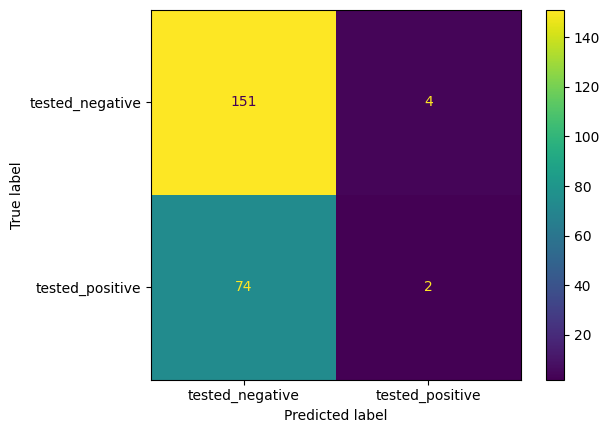

In [56]:
# import diabetes dataset
import pandas as pd

diabetes = pd.read_csv("data/diabetes.csv")

random_state = 99
max_iter = 500


# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.drop("class", axis=1), diabetes["class"], test_size=0.3, random_state=random_state
)

# RELU activation function
def relu(x):
    return max(0, x)

# construct neural network with 8 inputs, 2 hidden layers, first with 6 neurons and second 3 and 1 output
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(6, 3), max_iter=max_iter, random_state=random_state, activation="relu"
)

# train the model
mlp.fit(X_train, y_train)

# predict the test set
y_pred = mlp.predict(X_test)

# accuracy in percent
from sklearn.metrics import accuracy_score
print(
    f"Accuracy for NN with params: (8,6,3,1) = {accuracy_score(y_test, y_pred)*100:.2f}%"
)

# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

## Zadanie 4

Epoch 1/500
17/17 [==============================] - 0s 830us/step - loss: 8.3706 - accuracy: 0.5345
Epoch 2/500
17/17 [==============================] - 0s 792us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 3/500
17/17 [==============================] - 0s 784us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 4/500
17/17 [==============================] - 0s 759us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 5/500
17/17 [==============================] - 0s 732us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 6/500
17/17 [==============================] - 0s 706us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 7/500
17/17 [==============================] - 0s 564us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 8/500
17/17 [==============================] - 0s 573us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 9/500
17/17 [==============================] - 0s 613us/step - loss: 8.3697 - accuracy: 0.5345
Epoch 10/500
17/17 [==============================] - 0s 556us/step - loss: 8.3697 - accura

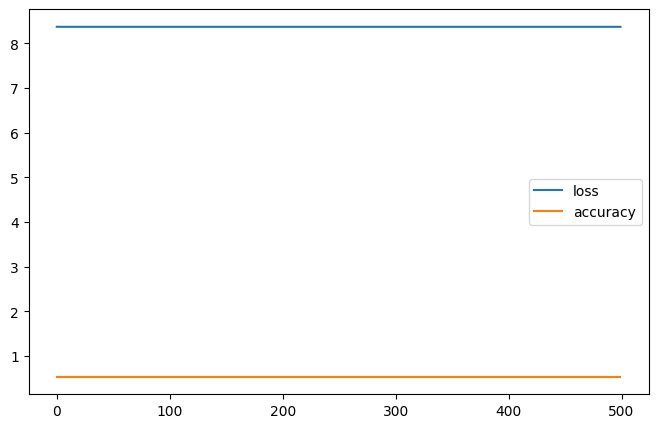

Epoch 1/500
17/17 [==============================] - 0s 695us/step - loss: 2239.5793 - accuracy: 0.5382
Epoch 2/500
17/17 [==============================] - 0s 676us/step - loss: 1690.9089 - accuracy: 0.5680
Epoch 3/500
17/17 [==============================] - 0s 671us/step - loss: 1267.4965 - accuracy: 0.6145
Epoch 4/500
17/17 [==============================] - 0s 647us/step - loss: 981.6617 - accuracy: 0.6462
Epoch 5/500
17/17 [==============================] - 0s 662us/step - loss: 770.4630 - accuracy: 0.6331
Epoch 6/500
17/17 [==============================] - 0s 579us/step - loss: 607.9266 - accuracy: 0.6294
Epoch 7/500
17/17 [==============================] - 0s 588us/step - loss: 496.4673 - accuracy: 0.6052
Epoch 8/500
17/17 [==============================] - 0s 575us/step - loss: 412.3798 - accuracy: 0.6052
Epoch 9/500
17/17 [==============================] - 0s 594us/step - loss: 348.6155 - accuracy: 0.6015
Epoch 10/500
17/17 [==============================] - 0s 577us/step - 

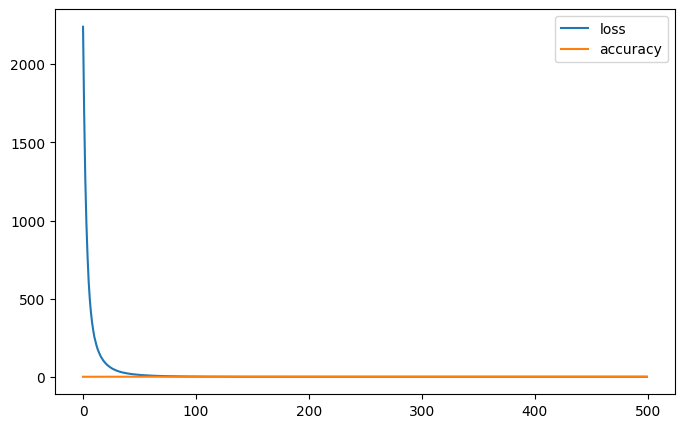

In [80]:
# import diabetes dataset
import pandas as pd

diabetes = pd.read_csv("data/diabetes.csv")

# replace tested positive and tested negative with 1 and 0
diabetes["class"] = diabetes["class"].replace("tested_positive", 1)
diabetes["class"] = diabetes["class"].replace("tested_negative", 0)

random_state = 99
max_iter = 500

# split data into train and test sets using keras
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.iloc[:, :-1], diabetes.iloc[:, -1], test_size=0.3, random_state=random_state
)

# RELU activation function
def relu(x):
    return max(0, x)

# construct neural network with 8 inputs, 2 hidden layers, first with 6 neurons and second 3 and 1 output 
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(6, input_dim=8, activation="relu"))
model.add(Dense(3, activation="relu"))

# train the model
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
history = model.fit(X_train, y_train, epochs=max_iter)

# predict the test set
y_pred = model.predict(X_test)

# loss curve
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()


# loss function - mean squared error
model.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer="adam")
history = model.fit(X_train, y_train, epochs=max_iter)

# predict the test set
y_pred = model.predict(X_test)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

